In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import database
heart_disease = pd.read_csv("../../dataset/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X, y
X = heart_disease.drop("target", axis=1)
y = heart_disease['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create Model
clf = RandomForestClassifier()

# Fit Model
clf.fit(X_train, y_train)

# Make Prediction
y_pred = clf.predict(X_test)


In [5]:
# Evaluate model using evaluation function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_accuracy_score(y_test, y_pred):

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metric_dict = {
        "Accuracy": round(accuracy, 2),
        "Precision": round(precision, 2),
        "Recall": round(recall, 2),
        "f1 Score": round(f1, 2)
    }
    
    print(f"Accuracy Score:{ accuracy*100:.2f}%")
    print(f"Precision Score: {precision*100:.2f}%")
    print(f"Roc Curv Score: {roc_auc_score(y_test, y_pred)*100:.2f}%")
    print(f"Recall Score: {recall*100:.2f}%")
    print(f"F1 Score: {f1*100:.2f}%")

    return metric_dict




In [6]:
get_accuracy_score(y_test, y_pred)

Accuracy Score:85.25%
Precision Score: 84.85%
Roc Curv Score: 85.13%
Recall Score: 87.50%
F1 Score: 86.15%


{'Accuracy': 0.85, 'Precision': 0.85, 'Recall': 0.88, 'f1 Score': 0.86}

In [7]:
# These are hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Now its tiem to improve this model

Three way to adjust hyperparameters
* By hand
* Random With RandomSearchCV
* Exhaustively With GridSearchCV

## 1. Tuning hyperparameters by hand
* Let's make 3 sets, training, validation, test

## Now we'r going to try and adjust
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [11]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffled data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Create X, Y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split dataset into train, validation and test set
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make baseline prediction
y_pred = clf.predict(X_valid)

baseline_metrics = get_accuracy_score(y_valid, y_pred)
baseline_metrics


Accuracy Score:82.22%
Precision Score: 81.48%
Roc Curv Score: 81.50%
Recall Score: 88.00%
F1 Score: 84.62%


{'Accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.88, 'f1 Score': 0.85}

In [12]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=50, max_depth=10)

# fit model
clf_2.fit(X_train, y_train)

# Make perdiction with differents hyperparameters
y_pred_2 = clf_2.predict(X_valid)

# Evalute the second classifier 
clf_2_metrics = get_accuracy_score(y_valid, y_pred)
clf_2_metrics


Accuracy Score:82.22%
Precision Score: 81.48%
Roc Curv Score: 81.50%
Recall Score: 88.00%
F1 Score: 84.62%


{'Accuracy': 0.82, 'Precision': 0.81, 'Recall': 0.88, 'f1 Score': 0.85}

## Hyperparameters tuning with RandomizedSearchCV

In [14]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

clf_3 = RandomForestClassifier()


# Hyperparameters range
param_distributions = {
    "n_estimators": [10, 50, 100, 200, 500, 1000],
    "max_depth": [None, 10, 20, 30, 60, 100],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2']
}

np.random.seed(42)

# Create X,y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier(n_jobs=-1)

# RandomizedSearchCv setup
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=3
)

# Fit the model
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.776 total time=   0.1s
[CV 2/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.729 total time=   0.0s
[CV 4/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.833 total time=   0.1s
[CV 5/5] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.854 total time=   0.0s
[CV 1/5] END max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.796 total time=   0.2s
[CV 2/5] END max_depth=60, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.8

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 10, 20, 30, 60,
                                                      100],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         1000]},
                   verbose=3)

In [15]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10}

In [16]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10}

In [17]:
random_search.best_score_

0.8348639455782314

In [18]:
# make prediction with the best parameters
rs_y_preds = random_search.predict(X_test)

rs_metrics = get_accuracy_score(y_test, rs_y_preds)


Accuracy Score:83.61%
Precision Score: 78.12%
Roc Curv Score: 84.04%
Recall Score: 89.29%
F1 Score: 83.33%


In [19]:
rs_metrics

{'Accuracy': 0.84, 'Precision': 0.78, 'Recall': 0.89, 'f1 Score': 0.83}

In [116]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters range
param_grid = {
    "n_estimators": [10, 20, 50],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ['sqrt', 'log2']
}

np.random.seed(42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
gs_clf = RandomForestClassifier(n_jobs=1)

# # Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=gs_clf,
    param_grid=param_grid, 
    cv=5,
    verbose=2
)

# Fit model
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_esti

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 50]},
             verbose=2)

In [21]:
3*2*2*2*2*5

240

In [22]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [23]:
grid_search.best_score_

0.8431972789115647

In [24]:
gs_y_pred = grid_search.predict(X_test)

gs_metrics = get_accuracy_score(y_test, gs_y_pred)
gs_metrics

Accuracy Score:85.25%
Precision Score: 80.65%
Roc Curv Score: 85.55%
Recall Score: 89.29%
F1 Score: 84.75%


{'Accuracy': 0.85, 'Precision': 0.81, 'Recall': 0.89, 'f1 Score': 0.85}

In [25]:
gs_metrics

{'Accuracy': 0.85, 'Precision': 0.81, 'Recall': 0.89, 'f1 Score': 0.85}

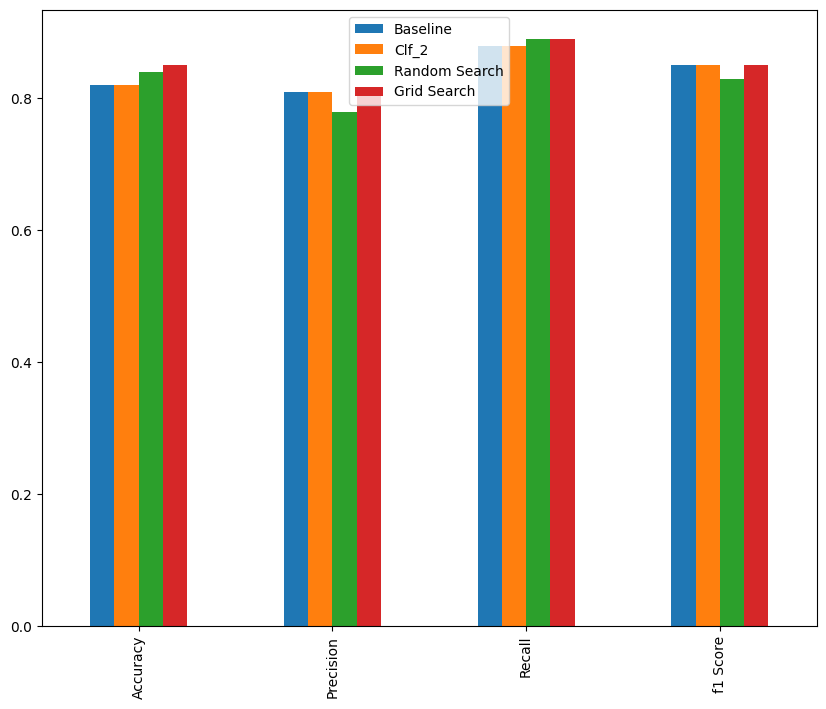

In [64]:
compare_mertics = pd.DataFrame({
    "Baseline": baseline_metrics,
    "Clf_2":clf_2_metrics,
    "Random Search":rs_metrics,
    "Grid Search":gs_metrics
})

compare_mertics.plot.bar(figsize=(10, 8));

## Save and Load a model
Two way to save and load machine learning model
1. with python `pickle` module
2. with the `joblib` module

##  Pickle

In [118]:
import pickle
with open("gs_random_forest_model1.pkl", "wb") as file:
    pickle.dump(grid_search, file)

In [120]:
# load save data
with open("gs_random_forest_model1.pkl", "rb") as file:
    loaded_pickle_model = pickle.load(file)


In [124]:
# make prediction
pickle_y_preds = loaded_pickle_model.predict(X_test)
get_accuracy_score(y_test, pickle_y_preds)

Accuracy Score:85.25%
Precision Score: 80.65%
Roc Curv Score: 85.55%
Recall Score: 89.29%
F1 Score: 84.75%


{'Accuracy': 0.85, 'Precision': 0.81, 'Recall': 0.89, 'f1 Score': 0.85}

***joblib***

In [135]:
from joblib import dump, load

dump(grid_search, "gs_random_forest_model.joblib")
print("Model Save Successfully")

Model Save Successfully


In [139]:
# load data
loaded_model = load("gs_random_forest_model.joblib")
joblib_y_preds = loaded_model.predict(X_test)
get_accuracy_score(y_test, joblib_y_preds)


Accuracy Score:85.25%
Precision Score: 80.65%
Roc Curv Score: 85.55%
Recall Score: 89.29%
F1 Score: 84.75%


{'Accuracy': 0.85, 'Precision': 0.81, 'Recall': 0.89, 'f1 Score': 0.85}